<a href="https://colab.research.google.com/github/amnnsharma/GlidePro/blob/main/Dynacard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.interpolate import interp1d

def fit_curve(x_data, y_data, kind='cubic'):
    interpolated_function = interp1d(x_data, y_data, kind=kind, fill_value="extrapolate")
    return interpolated_function

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import numpy as np
# Path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/deviation_data.xlsx'

# Load Excel file into a DataFrame
old_df = pd.read_excel(file_path)

# Display the loaded DataFrame
old_df.columns=['SN', 'MD', 'Inclination', 'Azimuth']
old_df=old_df.drop(columns=['SN'])

i=min(old_df['MD'].astype(float).tolist())
j=max(old_df['MD'].astype(float).tolist())

#TOTAL STEPS
steps=100

df=pd.DataFrame({'MD': np.linspace(i, j, steps)})  #Taken 100 steps, delta_s is max(MS)/100
df['Inclination'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Inclination'].astype(float).tolist())
df['Azimuth'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Azimuth'].astype(float).tolist())


md=df['MD'].astype(float).tolist()
inclination=df['Inclination'].astype(float).tolist()
azimuth=df['Azimuth'].astype(float).tolist()

ds=max(md)/steps

In [20]:
import math

T_s=[]

for i in range(len(md)):
  T_s.append(np.array([math.sin(math.radians(inclination[i]))*math.cos(math.radians(azimuth[i])),
                       math.sin(math.radians(inclination[i]))*math.sin(math.radians(azimuth[i])),
                       math.cos(math.radians(inclination[i]))]))


In [50]:
gamma=[]
rc=[]
B_s=[]

for i in range(len(md)-1):
  if T_s[i+1][0]!=T_s[i][0] and T_s[i+1][1]!=T_s[i][1] and T_s[i+1][2]!=T_s[i][2]:
    gamma_i=math.acos(np.dot(T_s[i], T_s[i+1]))
    gamma.append(gamma_i)
    rc.append((md[i+1]-md[i])/gamma_i)
  else:
    gamma.append(0)
    rc.append(np.inf)

  B_s.append(np.cross(T_s[i], T_s[i+1]))


N_s=[]

for i in range(len(md)-1):
  if T_s[i][1]==0:
    N_s.append(np.array([0, 1, 0]))
  else:
    f=(1+(T_s[i][0]/T_s[i][1])**2)**0.5
    N_s.append(np.array([1/f, -T_s[i][0]/T_s[i][1]/f, 0]))

g=np.array([0, 0, -9.81])

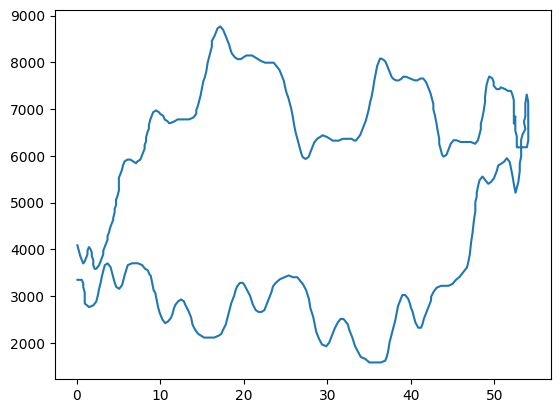

In [188]:
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat('/content/drive/My Drive/dyna_data.mat')

for key, value in mat_data.items():
    #print(type(key))
    if isinstance(value, np.ndarray):
      if key=='F':
        F=list(np.ravel(value))
      if key=='X':
        u=list(np.ravel(value))
      #print(key)
      #print(value)
      #dyna_readings[value]=key


import matplotlib.pyplot as plt
plt.plot(u,F)

In [189]:
def get_derivatives(F, u):
    data_points=len(F)
    F=np.append(F, F[:2])
    u=np.append(u, u[:2])

    df_dt=[]
    d2f_dt2=[]
    du_dt=[]
    d2u_dt2=[]

    dt=30/data_points #getting this data in 30 seconds i.e. 2 SPM

    for i in range(data_points+1):
      df_dt.append((F[i+1]-F[i])/dt)

    for i in range(data_points):
      d2f_dt2.append((df_dt[i+1]-df_dt[i])/dt)

    df_dt=df_dt[:-1]

    for i in range(data_points+1):
      du_dt.append((u[i+1]-u[i])/dt)


    for i in range(data_points):
      d2u_dt2.append((du_dt[i+1]-du_dt[i])/dt)

    du_dt=du_dt[:-1]

    return du_dt, d2u_dt2, df_dt, d2f_dt2

In [190]:
du_dt, d2u_dt2, df_dt, d2f_dt2= get_derivatives(u, F)

In [191]:
np.array(u).shape

(456,)

In [193]:
ds*g@T_s[1]*np.ones(len(du_dt))

array([-164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, 

In [202]:
from itertools import chain

step_recorder=[[u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2]]

fr=[]

for i in range(steps-1):
    if i==0:
      u=u[:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt)) -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456]- ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))
      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    else:

      u=2*u[:456]-step_recorder[i-1][0][:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))
      -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456] -ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))

    #print(np.array(u).shape)
    #print(u)
    du_dt, d2u_dt2, _, _ = get_derivatives(u, F)
    step_recorder.append([u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [198]:
np.array(step_recorder).shape

(100, 6, 456)

In [200]:
fr_distribution=[]
fr=list(fr)

for i in fr:
  fr_distribution.append(max(i))


#plt.plot(fr_distribution, md)
fr_distribution
fr

[[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan,

In [ ]:
from scipy.interpolate import interp1d

def fit_curve(x_data, y_data, kind='cubic'):
    interpolated_function = interp1d(x_data, y_data, kind=kind, fill_value="extrapolate")
    return interpolated_function
import pandas as pd


import numpy as np
# Path to your Excel file in Google Drive
file_path = 'deviation_data.xlsx'

# Load Excel file into a DataFrame
old_df = pd.read_excel(file_path)

# Display the loaded DataFrame
old_df.columns=['SN', 'MD', 'Inclination', 'Azimuth']
old_df=old_df.drop(columns=['SN'])

i=min(old_df['MD'].astype(float).tolist())
j=max(old_df['MD'].astype(float).tolist())

#TOTAL STEPS
steps=100

df=pd.DataFrame({'MD': np.linspace(i, j, steps)})  #Taken 100 steps, delta_s is max(MS)/100
df['Inclination'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Inclination'].astype(float).tolist())
df['Azimuth'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Azimuth'].astype(float).tolist())


md=df['MD'].astype(float).tolist()
inclination=df['Inclination'].astype(float).tolist()
azimuth=df['Azimuth'].astype(float).tolist()

ds=max(md)/steps
import math

T_s=[]

for i in range(len(md)):
  T_s.append(np.array([math.sin(math.radians(inclination[i]))*math.cos(math.radians(azimuth[i])),
                       math.sin(math.radians(inclination[i]))*math.sin(math.radians(azimuth[i])),
                       math.cos(math.radians(inclination[i]))]))

gamma=[]
rc=[]
B_s=[]

for i in range(len(md)-1):
  if T_s[i+1][0]!=T_s[i][0] and T_s[i+1][1]!=T_s[i][1] and T_s[i+1][2]!=T_s[i][2]:
    gamma_i=math.acos(np.dot(T_s[i], T_s[i+1]))
    gamma.append(gamma_i)
    rc.append((md[i+1]-md[i])/gamma_i)
  else:
    gamma.append(0)
    rc.append(np.inf)

  B_s.append(np.cross(T_s[i], T_s[i+1]))


N_s=[]

for i in range(len(md)-1):
  if T_s[i][1]==0:
    N_s.append(np.array([0, 1, 0]))
  else:
    f=(1+(T_s[i][0]/T_s[i][1])**2)**0.5
    N_s.append(np.array([1/f, -T_s[i][0]/T_s[i][1]/f, 0]))

g=np.array([0, 0, -9.81])

#Dyna Data from excel
dyna_df=pd.read_excel('dyna_data.xlsx')
dyna_df.columns=['F','u']
F=dyna_df['F'].to_list()
u=dyna_df['u'].to_list()

import matplotlib.pyplot as plt
plt.plot(u,F)
def get_derivatives(F, u):
    data_points=len(F)
    F=np.append(F, F[:2])
    u=np.append(u, u[:2])

    df_dt=[]
    d2f_dt2=[]
    du_dt=[]
    d2u_dt2=[]

    dt=30/data_points #getting this data in 30 seconds i.e. 2 SPM

    for i in range(data_points+1):
      df_dt.append((F[i+1]-F[i])/dt)

    for i in range(data_points):
      d2f_dt2.append((df_dt[i+1]-df_dt[i])/dt)

    df_dt=df_dt[:-1]

    for i in range(data_points+1):
      du_dt.append((u[i+1]-u[i])/dt)


    for i in range(data_points):
      d2u_dt2.append((du_dt[i+1]-du_dt[i])/dt)

    du_dt=du_dt[:-1]

    return du_dt, d2u_dt2, df_dt, d2f_dt2
du_dt, d2u_dt2, df_dt, d2f_dt2= get_derivatives(u, F)

from itertools import chain

step_recorder=[[u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2]]

fr=[]

for i in range(steps-1):
    if i==0:
      u=u[:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt)) -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456]- ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))
      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    else:

      u=2*u[:456]-step_recorder[i-1][0][:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))
      -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456] -ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))

      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    #print(np.array(u).shape)
    #print(u)
    du_dt, d2u_dt2, _, _ = get_derivatives(u, F)
    step_recorder.append([u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2])


fr_distribution=[]
fr=list(fr)

for i in fr:
  fr_distribution.append(max(i))


plt.plot(fr_distribution)
plt.show()
